In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv('../data/zoo_data.csv')

In [7]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
classes = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

### Training a decision tree classifier

In [9]:
#data preparation
X_train, X_test, y_train, y_test = train_test_split(df.drop('animal_name', axis=1).drop('class_type', axis=1), df['class_type'], train_size=0.65)

In [10]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0


In [12]:
y_train.head()

16     2
77     7
100    2
9      1
36     1
Name: class_type, dtype: int64

In [13]:
#Init classifier
model = DecisionTreeClassifier()

In [14]:
#Fit data on the classifier
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
41,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [16]:
#Predict on unseen data
y_pred = model.predict(X_test)

In [17]:
y_pred

array([1, 2, 1, 1, 4, 4, 1, 2, 7, 1, 1, 4, 6, 6, 7, 6, 1, 6, 1, 1, 1, 1,
       6, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 5, 5, 6])

### Evaluating model

In [18]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  3  2]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         3
           7       1.00      0.40      0.57         5

    accuracy                           0.89        36
   macro avg       0.71      0.77      0.70        36
weighted avg       0.92      0.89      0.88        36



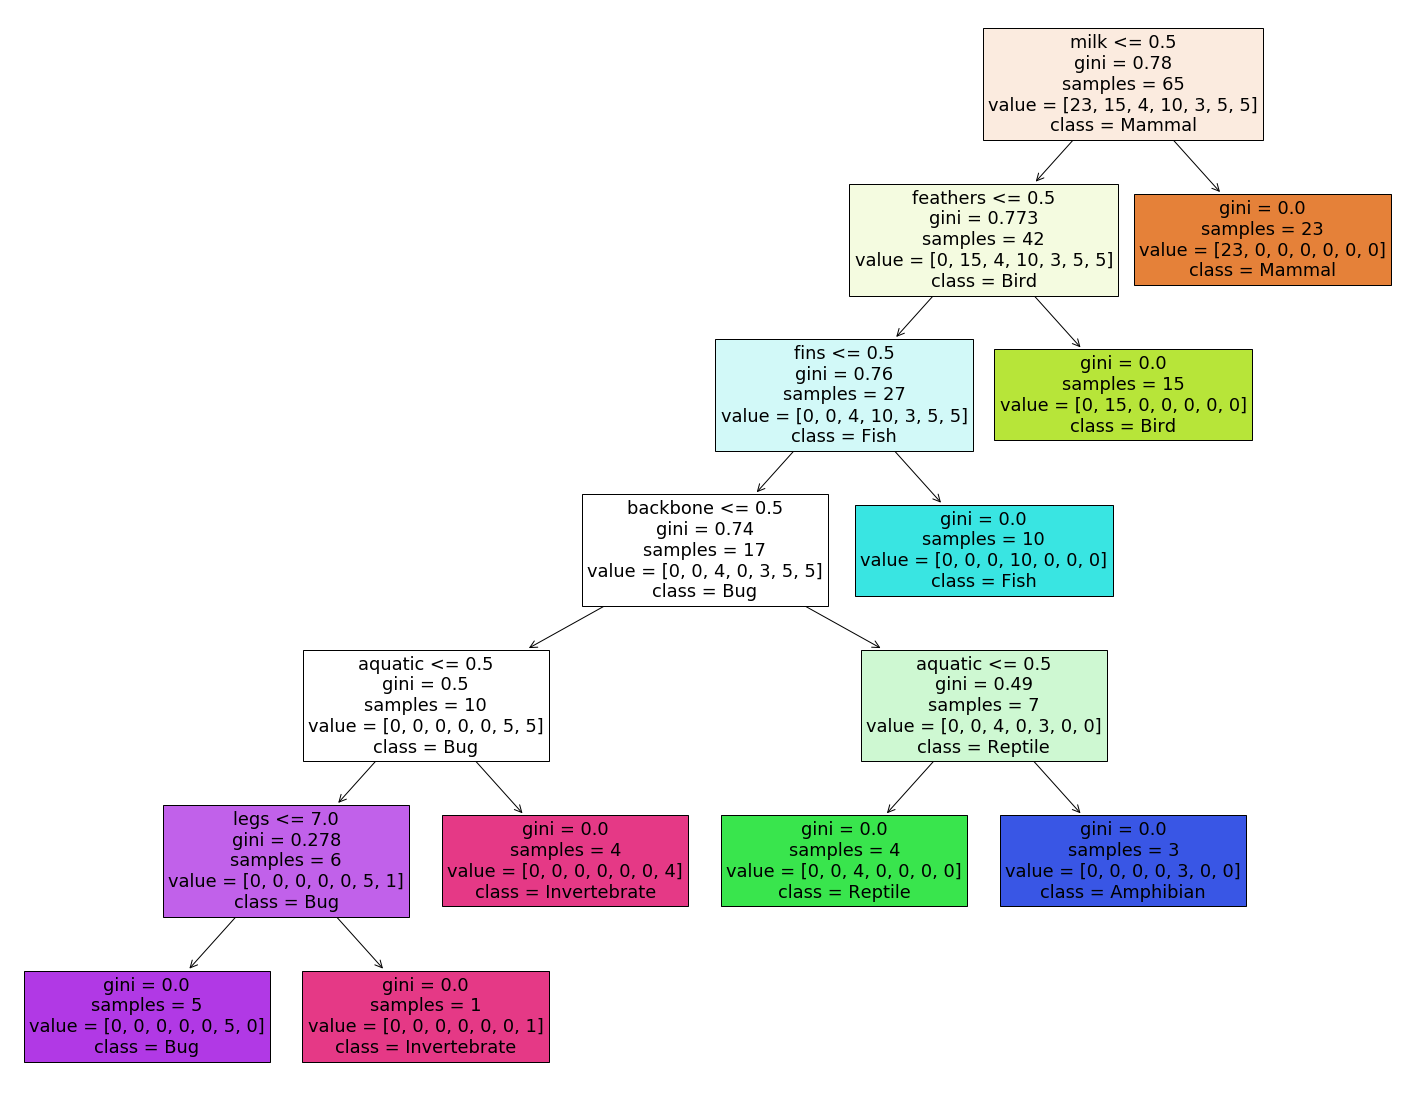

In [21]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, 
                   feature_names=X_train.columns,  
                   class_names=classes,
                   filled=True)